<a href="https://colab.research.google.com/github/Aryan12Dubey/Bank-Customer-Segmentation/blob/main/Bank_Customer_Segment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Perform customer segmentation using bank data into distinct categories based on their behavioral patterns

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand clustering
* Find groups or clusters using K-means algorithm
* Visualize the high-dimensional data to low-dimensional data (2D) by applying t-SNE algorithm

## Domain Information

- **Customer segmentation** refers to the process of dividing a set of potential customers into groups (or segments) based on shared attributes, interests, and behaviors.
- One of the key pain points for bank marketing team is to know their customers and identify their needs.
- For this mini-hackathon, we will use the popular **K-Means clustering** algorithm to segment customers based on their behavior from the bank data. The basic concept is that consumers who share common traits would respond to marketing communication in a similar way so that the bank marketing team can reach out to each group in a relevant and effective way.

## Dataset

### Description

The dataset chosen for this mini hackathon is the behavior of customers in the bank for 6 months, this dataset is made up of 13 features.

**Attribute Information**

- **CUSTID:** Identification of Credit Cardholder
- **BALANCE:** Balance amount left in customer's account to make purchases
- **PURCHASES:** Amount of purchases made from the account
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by a user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by a user
- **PRC_FULL_PAYMENT:** Percent of full payment paid by a user
- **TENURE:** Tenure of credit card service for user

**Note:** The currency values mentioned above are in "dollars"

### Importing Required Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## **Stage 1:** Data Pre-Processing

- Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values

- Perform correlation on the data features and remove highly correlated features from the data
  
  Hint: Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

- Drop any unwanted columns
  
  Hint: Use pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- Perform `StandardScaler()` on the data features
  
  Hint: Use Sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [ ]:
data = pd.read_csv("/content/Marketing_data_clustering.csv")
data

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,95.40,0.000000,0.166667,0.000000,0,1000.0,201.802084,139.509787,0.000000,12
1,C10005,817.714335,16.00,0.00,0.000000,0.083333,0.000000,0,1200.0,678.334763,244.791237,0.000000,12
2,C10008,1823.652743,436.20,436.20,0.000000,1.000000,0.000000,0,2300.0,679.065082,532.033990,0.000000,12
3,C10009,1014.926473,861.49,200.00,0.000000,0.333333,0.000000,0,7000.0,688.278568,311.963409,0.000000,12
4,C10015,2772.772734,0.00,0.00,346.811390,0.000000,0.083333,1,3000.0,805.647974,989.962866,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,C18976,981.286008,1370.00,0.00,0.000000,0.083333,0.000000,0,1400.0,596.685481,451.584847,0.000000,12
2990,C18980,87.026009,605.52,605.52,0.000000,1.000000,0.000000,0,1500.0,511.637312,175.012705,0.000000,12
2991,C18986,16.428326,441.50,316.80,0.000000,1.000000,0.000000,0,1000.0,482.547848,91.328536,0.333333,12
2992,C18998,67.377243,295.00,295.00,0.000000,0.500000,0.000000,0,1000.0,245.689379,167.126034,0.300000,12


In [ ]:
data.isna().sum()

CUST_ID                    0
BALANCE                    0
PURCHASES                  0
INSTALLMENTS_PURCHASES     0
CASH_ADVANCE               0
PURCHASES_FREQUENCY        0
CASH_ADVANCE_FREQUENCY     0
CASH_ADVANCE_TRX           0
CREDIT_LIMIT               0
PAYMENTS                   0
MINIMUM_PAYMENTS          49
PRC_FULL_PAYMENT           0
TENURE                     0
dtype: int64

In [ ]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

In [ ]:
data.isna().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

In [ ]:
data = data.drop(['CUST_ID','TENURE',"PRC_FULL_PAYMENT"],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BALANCE                 2994 non-null   float64
 1   PURCHASES               2994 non-null   float64
 2   INSTALLMENTS_PURCHASES  2994 non-null   float64
 3   CASH_ADVANCE            2994 non-null   float64
 4   PURCHASES_FREQUENCY     2994 non-null   float64
 5   CASH_ADVANCE_FREQUENCY  2994 non-null   float64
 6   CASH_ADVANCE_TRX        2994 non-null   int64  
 7   CREDIT_LIMIT            2994 non-null   float64
 8   PAYMENTS                2994 non-null   float64
 9   MINIMUM_PAYMENTS        2994 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 234.0 KB


<Axes: >

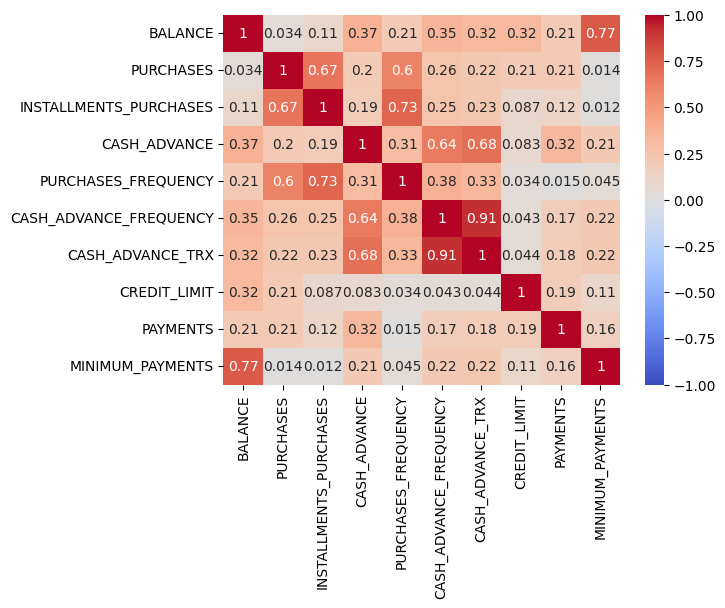

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
corr_matrix = data.corr().abs()
sns.heatmap(corr_matrix,annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<ipython-input-11-95e4119c75c5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<Axes: >

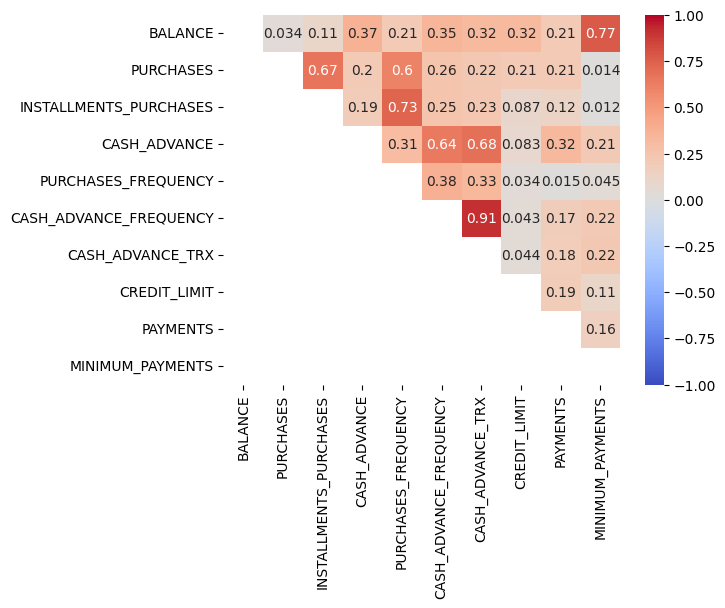

In [ ]:
# select upper traingle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(upper.abs(),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
# Find index of columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

# drop the columns
feature = data.drop(columns=to_drop)
data1 = feature

In [ ]:
data1

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,0.000000,1000.0,201.802084
1,817.714335,16.00,0.000000,1200.0,678.334763
2,1823.652743,436.20,0.000000,2300.0,679.065082
3,1014.926473,861.49,0.000000,7000.0,688.278568
4,2772.772734,0.00,346.811390,3000.0,805.647974
...,...,...,...,...,...
2989,981.286008,1370.00,0.000000,1400.0,596.685481
2990,87.026009,605.52,0.000000,1500.0,511.637312
2991,16.428326,441.50,0.000000,1000.0,482.547848
2992,67.377243,295.00,0.000000,1000.0,245.689379


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature)
data=scaler.transform(feature)
data

array([[-1.13359969, -0.63261322, -0.6418366 , -0.90479325, -0.88170901],
       [-0.37630323, -0.8116596 , -0.6418366 , -0.82224017, -0.19700475],
       [ 0.60436139,  0.13588811, -0.6418366 , -0.36819827, -0.19595539],
       ...,
       [-1.15745725,  0.14783957, -0.6418366 , -0.90479325, -0.47832047],
       [-1.1077884 , -0.18251679, -0.6418366 , -0.90479325, -0.81864971],
       [-0.87406153,  1.20272491, -0.27657457, -0.90479325,  0.18367824]])

## **Stage 2:** K Means

- Find the right number of clusters to be chosen using the elbow method
  
- Perform K-Means on the chosen optimal number of clusters

  **Hint:** Refer to this [link](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) for finding the k-clusters using elbow method and applying kmeans

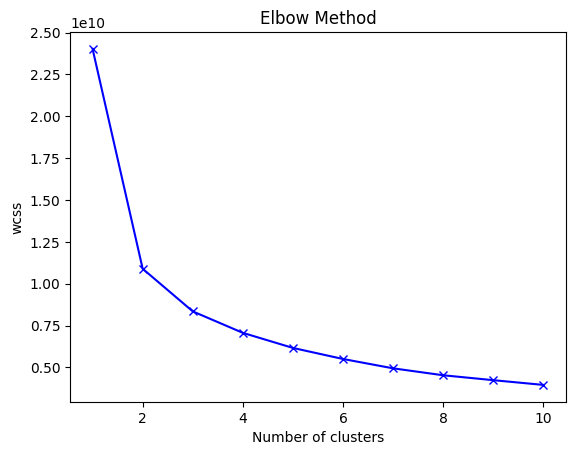

In [ ]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(feature)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# YOUR CODE HERE
#Import required module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 3)

#predict the labels of clusters.
label = kmeans.fit_predict(data)

set(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0, 1, 2}

In [ ]:
data[:,0]

array([-1.13359969, -0.37630323,  0.60436139, ..., -1.15745725,
       -1.1077884 , -0.87406153])

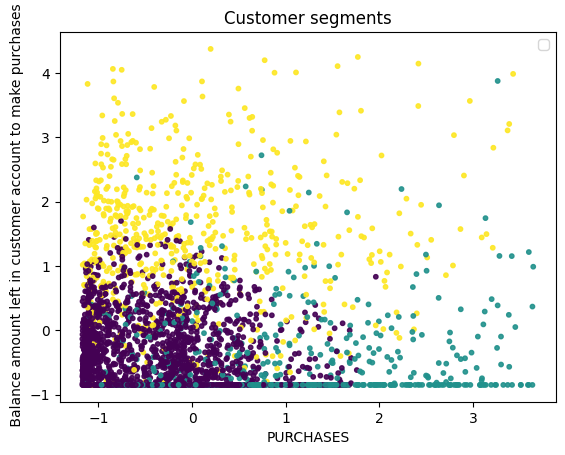

In [ ]:
#Visualizing the clusters for k=3
plt.scatter(data[:, 0],data[:, 1], c=label, alpha = 0.9, s=10)
plt.title('Customer segments')
plt.xlabel('PURCHASES')
plt.ylabel(' Balance amount left in customer account to make purchases')
plt.legend()
plt.show()

## **Stage 3:** Apply **TSNE** with 2 components (n_components = 2) and visualize the clusters

Hint: Use Sklearns [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**Note:** Produce a visualization with distinctly isolated clusters and It is not necessary to plot the centroids



In [ ]:
# YOUR CODE HERE
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(data)
X_embedded[0]

array([-51.90253  ,   1.4870341], dtype=float32)

<ipython-input-31-13ade5a2afa6>:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=label, palette=cluster_colors)


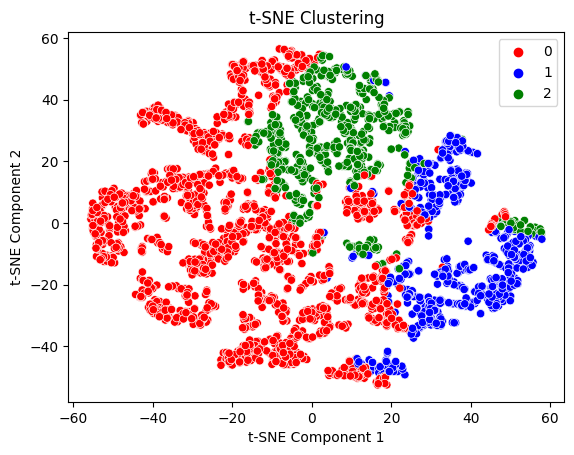

In [ ]:
cluster_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=label, palette=cluster_colors)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Clustering')
plt.show()

## **Stage 4:** Insights for each cluster

#### **Stage 4(a)**:
- To understand the behavior of the customers from each cluster print the respective centroid point values obtained from the scaled dataframe
- Get the original representation of the scaled centroid points using [inverse_transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform) technique

In [ ]:
inversed = scaler.inverse_transform(data)

In [ ]:
inversed

array([[  40.900749,   95.4     ,    0.      , 1000.      ,  201.802084],
       [ 817.714335,   16.      ,    0.      , 1200.      ,  678.334763],
       [1823.652743,  436.2     ,    0.      , 2300.      ,  679.065082],
       ...,
       [  16.428326,  441.5     ,    0.      , 1000.      ,  482.547848],
       [  67.377243,  295.      ,    0.      , 1000.      ,  245.689379],
       [ 307.127754,  909.3     ,  237.378894, 1000.      ,  943.27817 ]])

In [ ]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.33279595, -0.33030019, -0.35896121, -0.42201466, -0.43019049],
       [ 0.98343835, -0.47943373,  1.52431383,  0.41383602,  0.82349166],
       [ 0.01676415,  1.43634443, -0.43407399,  0.83401932,  0.45841516]])

In [ ]:
original_centroids=scaler.inverse_transform(centroids)
original_centroids

array([[ 862.34289098,  229.46389603,  183.83692244, 2169.61989939,
         516.04480493],
       [2212.49931608,  163.32905882, 1407.75211082, 4194.62184874,
        1388.56822926],
       [1220.91188675, 1012.90103279,  135.0221336 , 5212.59314456,
        1134.48644561]])

#### **Stage 4(b)**:
- Report your observations in the form of text, about the customers based on the centroid points

Hint: If require use [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

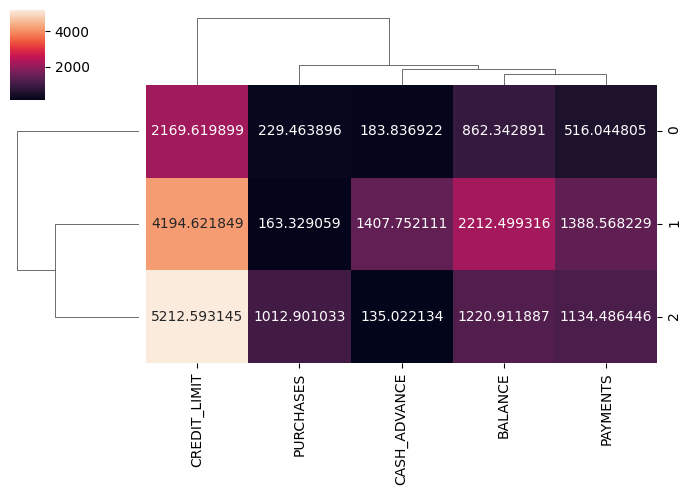

In [ ]:
centroid_df = pd.DataFrame(original_centroids, columns=feature.columns)
sns.clustermap(
    centroid_df,
    figsize=(7, 5),
    annot=True,
    fmt="f"
)

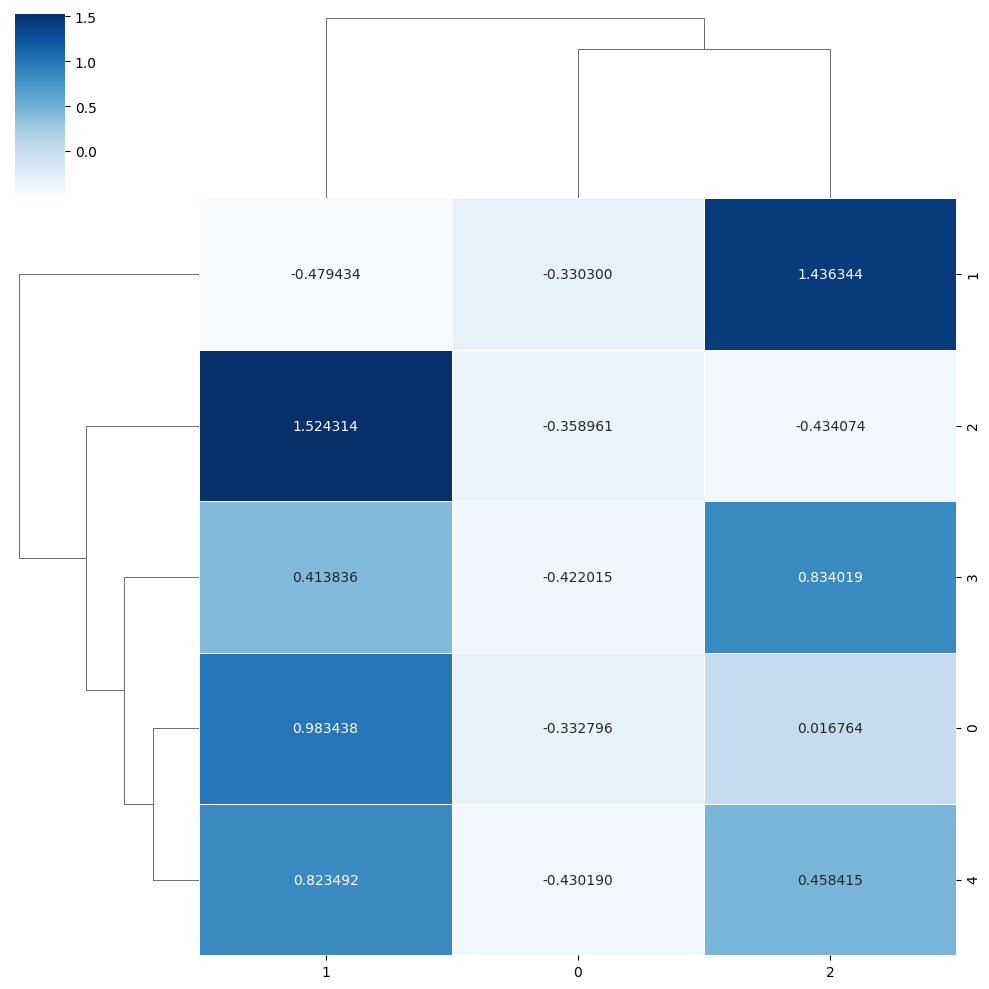

In [ ]:
sns.clustermap( centroids.T, cmap='Blues', linewidth=.5, annot=True, fmt='f');

In [ ]:
###If Balance amount left in customers account to make purchases is more then Amount of Payment done by a user is very less
### if Payment done by a user is high then Balance amount left in customers account to make purchases is less.
###Cluster that is shown by green, they have less Payment done because they have less Balance amount left.